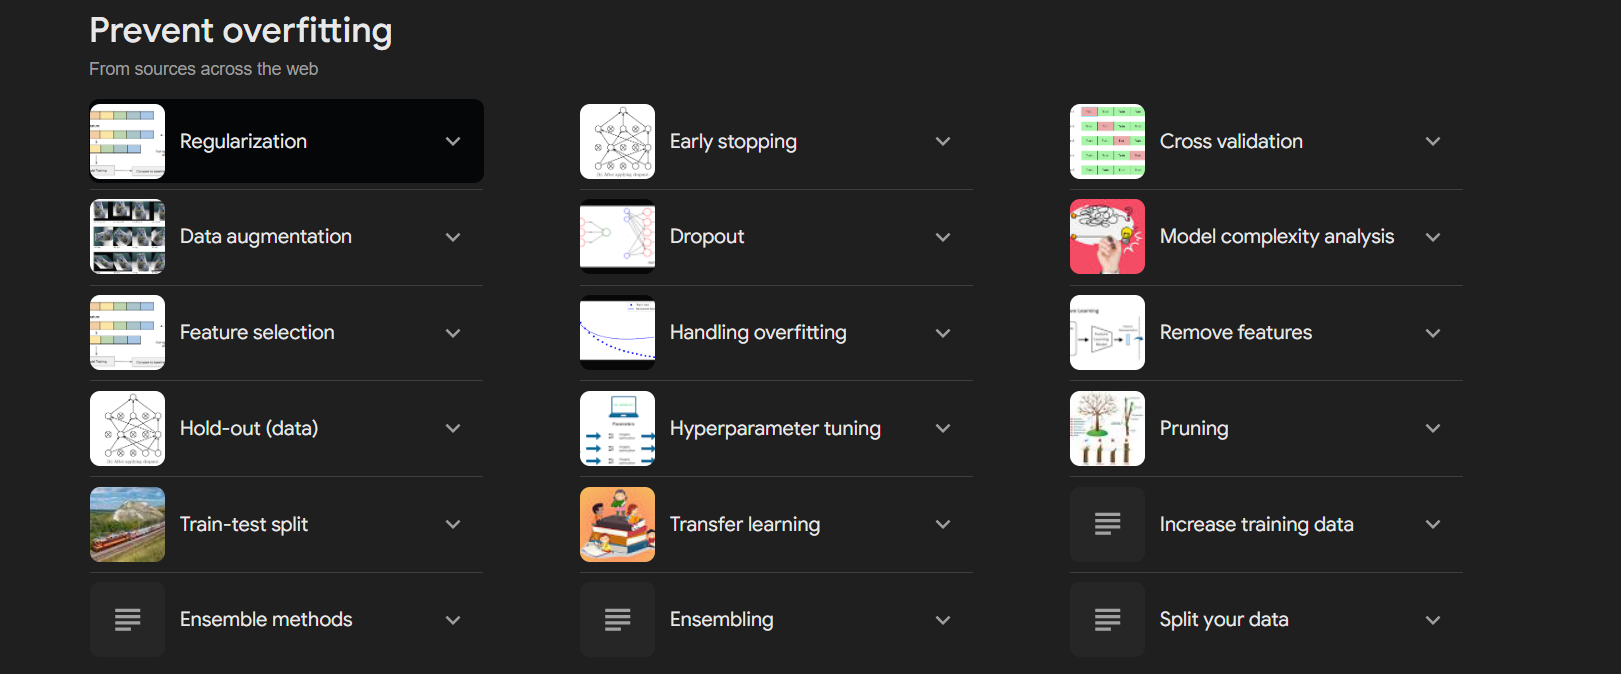

# Importing Libraries and reading data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/kaggle/input/eeg-motor-imagery-bciciv-2a/patients/patients/BCICIV_2a_1.csv')

In [3]:
data.columns

Index(['patient', 'time', 'label', 'epoch', 'EEG-Fz', 'EEG-0', 'EEG-1',
       'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz',
       'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12',
       'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16'],
      dtype='object')

Dataset: https://www.kaggle.com/datasets/aymanmostafa11/eeg-motor-imagery-bciciv-2a

A copy of 👇

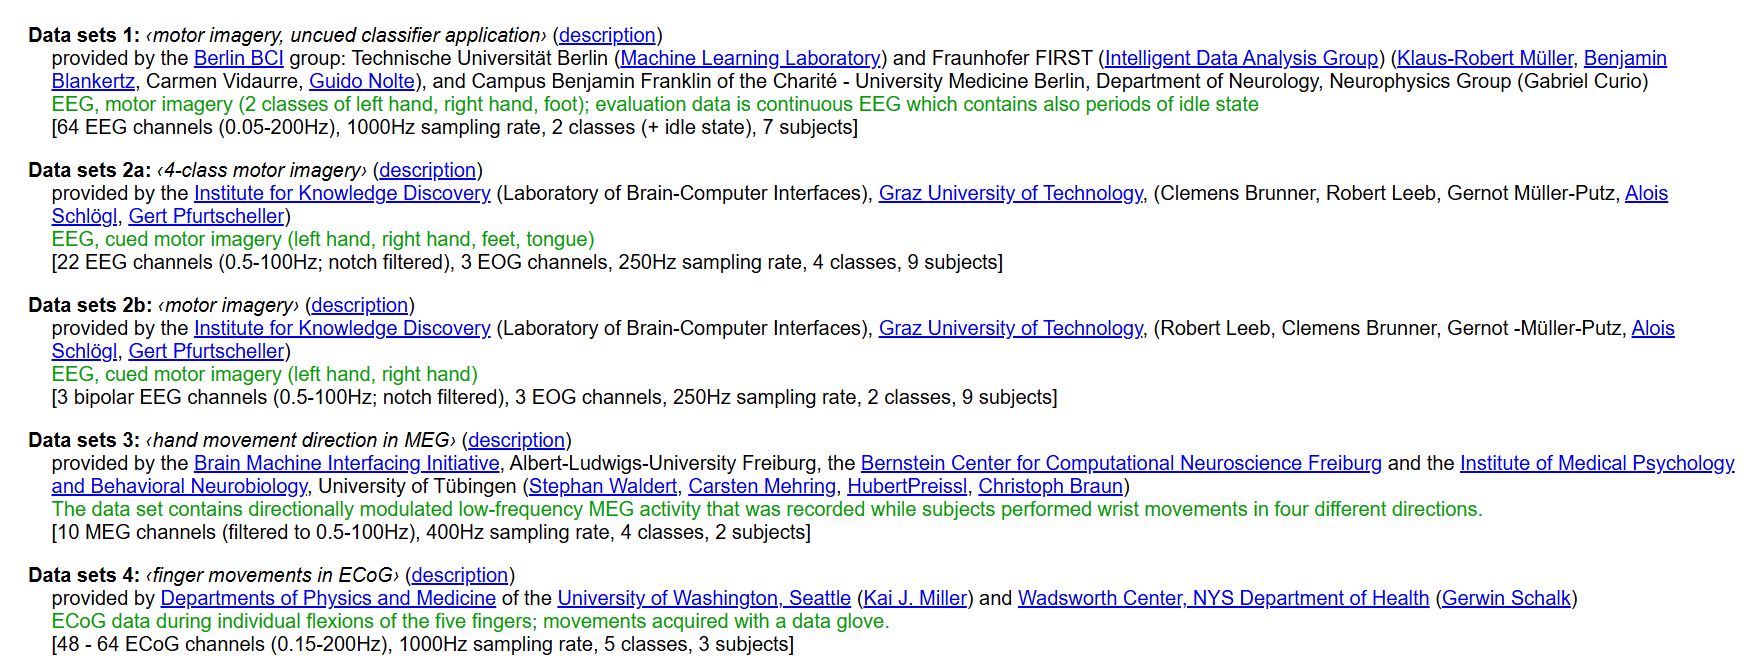

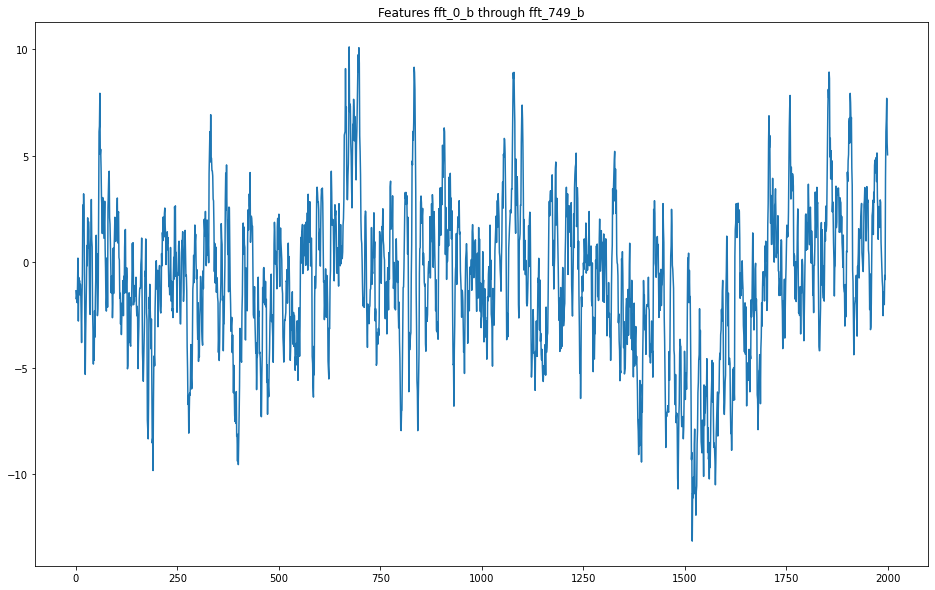

In [4]:
sample = data['EEG-Cz'][3000:5000]

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [5]:
data['label'].value_counts()

foot      14472
tongue    14472
left      14472
right     14472
Name: label, dtype: int64

# Preprocessing

It was mentioned that it has been filtered between 0.5 and 100Hz as well as notch filtered, therefore we don't apply any filters.
Therefore, we just do the train_test_split.

In [6]:
label_mapping = {'right': [1,0,0,0], 'left':[0,1,0,0], 'foot':[0,0,1,0], "tongue":[0,0,0,1]}

In [7]:
data.columns

Index(['patient', 'time', 'label', 'epoch', 'EEG-Fz', 'EEG-0', 'EEG-1',
       'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz',
       'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12',
       'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16'],
      dtype='object')

In [8]:
data[14470:14480]

,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
14470,1,0.696,tongue,156,17.291900,9.687859,8.497203,13.520866,4.168402,3.905482,...,-6.447959,-2.445931,-4.077917,-4.680756,-8.155065,-7.841438,-7.013238,-6.677075,-7.409497,-4.782169
14471,1,0.700,tongue,156,18.725671,9.070849,9.638006,13.343310,6.676392,7.585347,...,-2.963406,-3.697706,-5.671489,-6.616126,-7.209575,-6.602980,-9.534545,-9.540179,-10.223773,-8.865975
14472,1,-0.100,right,158,3.050819,4.650879,3.227351,3.343788,4.468712,3.456468,...,-1.086426,-1.099572,0.250714,-2.714656,-2.883676,-3.125939,-4.207670,-3.939115,-4.748535,-4.401104
14473,1,-0.096,right,158,2.362786,0.984331,2.881115,1.044427,3.780680,2.133670,...,1.057573,-1.494636,1.271665,-1.889017,-2.448662,-1.470222,-2.405468,-1.990429,-2.848677,-1.866481
14474,1,-0.092,right,158,-0.817700,0.928844,1.214301,-2.136060,0.307225,-0.607364,...,4.908336,0.451831,0.288444,-1.553878,-0.990477,0.280932,-0.214861,-0.678728,-1.732289,-0.945405
14475,1,-0.088,right,158,-1.672193,2.418102,0.652777,-2.746411,-2.402736,-3.366153,...,0.977672,2.917651,1.973015,-0.601730,-1.210203,-0.915357,1.469709,0.664045,-0.682484,0.299712
14476,1,-0.084,right,158,-0.802164,1.725630,1.425150,-2.120524,-2.606927,-3.375031,...,2.238326,1.102133,0.255153,-0.122326,-0.437831,0.735922,-0.004012,1.094621,1.164107,0.925600
14477,1,-0.080,right,158,-2.375761,3.618830,0.193349,-2.717558,-4.278180,-2.849019,...,1.104181,1.628145,-0.586023,-1.598267,0.576462,1.945528,0.961453,1.278836,2.861994,1.939894
14478,1,-0.076,right,158,-1.268251,3.993919,-0.115156,-1.512391,-3.561295,0.699898,...,-2.036355,1.661437,-1.529293,-0.051304,-0.073840,1.295226,0.408808,1.702753,2.992942,3.291545
14479,1,-0.072,right,158,-0.515854,-0.868919,-2.145962,-3.445541,-1.197570,1.842920,...,1.889870,-2.029526,-1.948771,-0.959063,1.703948,4.098404,-0.157155,2.113353,4.282449,4.776364


In [9]:
def preprocess_inputs(df):
    df = df.copy()
    
    y = list(np.array(df['label'].copy()))
    for i in range(len(y)):
        y[i] = label_mapping[y[i]]
    y = np.array(y)

    
    X = df.loc[:,"EEG-Fz":"EEG-16"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=123)
    X_train = np.array(tf.expand_dims(np.array(X_train), axis = 2))
    X_test = np.array(tf.expand_dims(np.array(X_test), axis = 2))
    
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

([<matplotlib.axis.YTick at 0x7eb64da7c610>,
 [Text(0, 0.5, 'EEG-Fz'),
  Text(0, 1.5, 'EEG-0'),
  Text(0, 2.5, 'EEG-1'),
  Text(0, 3.5, 'EEG-2'),
  Text(0, 4.5, 'EEG-3'),
  Text(0, 5.5, 'EEG-4'),
  Text(0, 6.5, 'EEG-5'),
  Text(0, 7.5, 'EEG-C3'),
  Text(0, 8.5, 'EEG-6'),
  Text(0, 9.5, 'EEG-Cz'),
  Text(0, 10.5, 'EEG-7'),
  Text(0, 11.5, 'EEG-C4'),
  Text(0, 12.5, 'EEG-8'),
  Text(0, 13.5, 'EEG-9'),
  Text(0, 14.5, 'EEG-10'),
  Text(0, 15.5, 'EEG-11'),
  Text(0, 16.5, 'EEG-12'),
  Text(0, 17.5, 'EEG-13'),
  Text(0, 18.5, 'EEG-14'),
  Text(0, 19.5, 'EEG-Pz'),
  Text(0, 20.5, 'EEG-15'),
  Text(0, 21.5, 'EEG-16')])

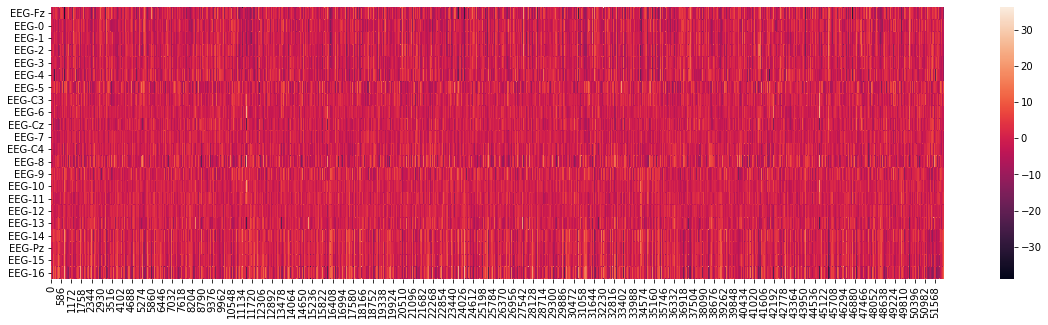

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(X_train[:,:,0].T)
plt.yticks(ticks = np.array(range(22))+0.5,labels = list(data.loc[:,"EEG-Fz":"EEG-16"].columns), rotation = 'horizontal')

In [12]:
y_train.shape

(52099, 4)

In [13]:
X_train.shape[1]

22

# Modeling

In [14]:

model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
# model.add(tf.keras.layers.GRU(32, return_sequences=True))
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 22, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 22, 64)            33024     
_________________________________________________________________
flatten (Flatten)            (None, 1408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                90176     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1

In [16]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
)

Epoch 1/50
652/652 [==============================] - 4s 7ms/step - loss: 1.3745 - accuracy: 0.2948 - val_loss: 1.3631 - val_accuracy: 0.3172
Epoch 2/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3453 - accuracy: 0.3330 - val_loss: 1.3373 - val_accuracy: 0.3345
Epoch 3/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3226 - accuracy: 0.3565 - val_loss: 1.3172 - val_accuracy: 0.3658
Epoch 4/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3049 - accuracy: 0.3693 - val_loss: 1.2965 - val_accuracy: 0.3802
Epoch 5/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2881 - accuracy: 0.3816 - val_loss: 1.2855 - val_accuracy: 0.3903
Epoch 6/50
652/652 [==============================] - 4s 5ms/step - loss: 1.2749 - accuracy: 0.3958 - val_loss: 1.2731 - val_accuracy: 0.3954
Epoch 7/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2597 - accuracy: 0.4087 - val_loss: 1.2590 - val_accuracy: 0.4079
Epoch 

In [17]:
datanew = pd.read_csv("/kaggle/input/eeg-motor-imagery-bciciv-2a/patients/patients/BCICIV_2a_2.csv")
X_train, X_test, y_train, y_test = preprocess_inputs(datanew)
X_train.shape, y_train.shape


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
)

Epoch 1/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3869 - accuracy: 0.2975 - val_loss: 1.3524 - val_accuracy: 0.3268
Epoch 2/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3463 - accuracy: 0.3334 - val_loss: 1.3326 - val_accuracy: 0.3479
Epoch 3/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3256 - accuracy: 0.3544 - val_loss: 1.3130 - val_accuracy: 0.3694
Epoch 4/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3066 - accuracy: 0.3712 - val_loss: 1.2968 - val_accuracy: 0.3857
Epoch 5/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2875 - accuracy: 0.3887 - val_loss: 1.2881 - val_accuracy: 0.3933
Epoch 6/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2705 - accuracy: 0.4002 - val_loss: 1.2722 - val_accuracy: 0.4030
Epoch 7/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2543 - accuracy: 0.4123 - val_loss: 1.2522 - val_accuracy: 0.4203
Epoch 

In [18]:
datanew = pd.read_csv("/kaggle/input/eeg-motor-imagery-bciciv-2a/patients/patients/BCICIV_2a_3.csv")
X_train, X_test, y_train, y_test = preprocess_inputs(datanew)
X_train.shape, y_train.shape


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
)

Epoch 1/50
652/652 [==============================] - 4s 6ms/step - loss: 1.4297 - accuracy: 0.2554 - val_loss: 1.3817 - val_accuracy: 0.2749
Epoch 2/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3817 - accuracy: 0.2730 - val_loss: 1.3761 - val_accuracy: 0.2941
Epoch 3/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3744 - accuracy: 0.2907 - val_loss: 1.3675 - val_accuracy: 0.3036
Epoch 4/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3659 - accuracy: 0.3051 - val_loss: 1.3570 - val_accuracy: 0.3159
Epoch 5/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3538 - accuracy: 0.3206 - val_loss: 1.3466 - val_accuracy: 0.3294
Epoch 6/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3412 - accuracy: 0.3363 - val_loss: 1.3363 - val_accuracy: 0.3384
Epoch 7/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3286 - accuracy: 0.3515 - val_loss: 1.3324 - val_accuracy: 0.3467
Epoch 

In [19]:
datanew = pd.read_csv("/kaggle/input/eeg-motor-imagery-bciciv-2a/patients/patients/BCICIV_2a_5.csv")
X_train, X_test, y_train, y_test = preprocess_inputs(datanew)
X_train.shape, y_train.shape


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
)

Epoch 1/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3830 - accuracy: 0.2991 - val_loss: 1.3411 - val_accuracy: 0.3305
Epoch 2/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3278 - accuracy: 0.3455 - val_loss: 1.3073 - val_accuracy: 0.3606
Epoch 3/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2959 - accuracy: 0.3703 - val_loss: 1.2776 - val_accuracy: 0.3832
Epoch 4/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2637 - accuracy: 0.3954 - val_loss: 1.2532 - val_accuracy: 0.4088
Epoch 5/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2385 - accuracy: 0.4157 - val_loss: 1.2248 - val_accuracy: 0.4236
Epoch 6/50
652/652 [==============================] - 4s 6ms/step - loss: 1.2084 - accuracy: 0.4366 - val_loss: 1.1977 - val_accuracy: 0.4432
Epoch 7/50
652/652 [==============================] - 4s 6ms/step - loss: 1.1849 - accuracy: 0.4512 - val_loss: 1.1766 - val_accuracy: 0.4559
Epoch 

In [20]:
datanew = pd.read_csv("/kaggle/input/eeg-motor-imagery-bciciv-2a/patients/patients/BCICIV_2a_6.csv")
X_train, X_test, y_train, y_test = preprocess_inputs(datanew)
X_train.shape, y_train.shape


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
)

Epoch 1/50
652/652 [==============================] - 4s 6ms/step - loss: 1.4534 - accuracy: 0.2704 - val_loss: 1.3744 - val_accuracy: 0.2781
Epoch 2/50
652/652 [==============================] - 4s 5ms/step - loss: 1.3723 - accuracy: 0.2841 - val_loss: 1.3700 - val_accuracy: 0.2846
Epoch 3/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3655 - accuracy: 0.2968 - val_loss: 1.3632 - val_accuracy: 0.2964
Epoch 4/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3577 - accuracy: 0.3039 - val_loss: 1.3535 - val_accuracy: 0.3112
Epoch 5/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3493 - accuracy: 0.3159 - val_loss: 1.3458 - val_accuracy: 0.3236
Epoch 6/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3373 - accuracy: 0.3280 - val_loss: 1.3376 - val_accuracy: 0.3344
Epoch 7/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3260 - accuracy: 0.3392 - val_loss: 1.3284 - val_accuracy: 0.3408
Epoch 

In [21]:
datanew = pd.read_csv("/kaggle/input/eeg-motor-imagery-bciciv-2a/patients/patients/BCICIV_2a_7.csv")
X_train, X_test, y_train, y_test = preprocess_inputs(datanew)
X_train.shape, y_train.shape


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
)

Epoch 1/50
1303/1303 [==============================] - 7s 6ms/step - loss: 1.3717 - accuracy: 0.3031 - val_loss: 1.3480 - val_accuracy: 0.3234
Epoch 2/50
1303/1303 [==============================] - 7s 5ms/step - loss: 1.3368 - accuracy: 0.3387 - val_loss: 1.3291 - val_accuracy: 0.3491
Epoch 3/50
1303/1303 [==============================] - 7s 5ms/step - loss: 1.3186 - accuracy: 0.3580 - val_loss: 1.3097 - val_accuracy: 0.3643
Epoch 4/50
1303/1303 [==============================] - 7s 6ms/step - loss: 1.2990 - accuracy: 0.3771 - val_loss: 1.3001 - val_accuracy: 0.3758
Epoch 5/50
1303/1303 [==============================] - 7s 6ms/step - loss: 1.2833 - accuracy: 0.3891 - val_loss: 1.2814 - val_accuracy: 0.3882
Epoch 6/50
1303/1303 [==============================] - 7s 5ms/step - loss: 1.2685 - accuracy: 0.4003 - val_loss: 1.2734 - val_accuracy: 0.3942
Epoch 7/50
1303/1303 [==============================] - 7s 5ms/step - loss: 1.2524 - accuracy: 0.4141 - val_loss: 1.2648 - val_accuracy:

In [22]:
datanew = pd.read_csv("/kaggle/input/eeg-motor-imagery-bciciv-2a/patients/patients/BCICIV_2a_8.csv")
X_train, X_test, y_train, y_test = preprocess_inputs(datanew)
X_train.shape, y_train.shape


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
)

Epoch 1/50
652/652 [==============================] - 4s 6ms/step - loss: 1.4381 - accuracy: 0.2649 - val_loss: 1.3756 - val_accuracy: 0.2859
Epoch 2/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3755 - accuracy: 0.2826 - val_loss: 1.3695 - val_accuracy: 0.2973
Epoch 3/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3701 - accuracy: 0.2911 - val_loss: 1.3625 - val_accuracy: 0.3086
Epoch 4/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3615 - accuracy: 0.3050 - val_loss: 1.3556 - val_accuracy: 0.3181
Epoch 5/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3545 - accuracy: 0.3171 - val_loss: 1.3467 - val_accuracy: 0.3325
Epoch 6/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3424 - accuracy: 0.3327 - val_loss: 1.3336 - val_accuracy: 0.3470
Epoch 7/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3315 - accuracy: 0.3441 - val_loss: 1.3230 - val_accuracy: 0.3613
Epoch 

In [23]:
datanew = pd.read_csv("/kaggle/input/eeg-motor-imagery-bciciv-2a/patients/patients/BCICIV_2a_9.csv")
X_train, X_test, y_train, y_test = preprocess_inputs(datanew)
X_train.shape, y_train.shape


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
)

Epoch 1/50
652/652 [==============================] - 4s 6ms/step - loss: 1.4275 - accuracy: 0.2702 - val_loss: 1.3769 - val_accuracy: 0.3004
Epoch 2/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3760 - accuracy: 0.2934 - val_loss: 1.3690 - val_accuracy: 0.3113
Epoch 3/50
652/652 [==============================] - 4s 5ms/step - loss: 1.3691 - accuracy: 0.3051 - val_loss: 1.3616 - val_accuracy: 0.3245
Epoch 4/50
652/652 [==============================] - 4s 5ms/step - loss: 1.3608 - accuracy: 0.3165 - val_loss: 1.3559 - val_accuracy: 0.3224
Epoch 5/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3511 - accuracy: 0.3309 - val_loss: 1.3465 - val_accuracy: 0.3372
Epoch 6/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3408 - accuracy: 0.3415 - val_loss: 1.3397 - val_accuracy: 0.3462
Epoch 7/50
652/652 [==============================] - 4s 6ms/step - loss: 1.3308 - accuracy: 0.3528 - val_loss: 1.3308 - val_accuracy: 0.3517
Epoch 

# Results

In [24]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 42.823%


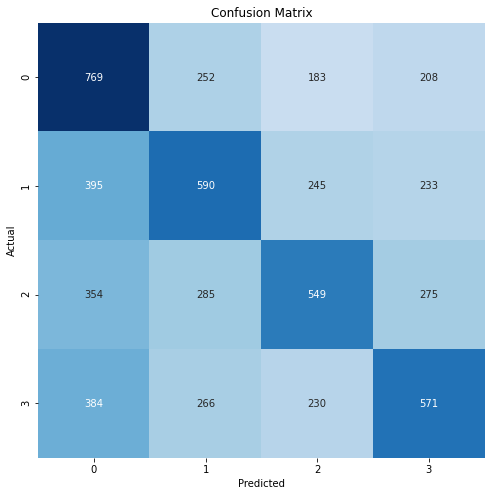

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.40      0.54      0.46      1412
           1       0.42      0.40      0.41      1463
           2       0.45      0.38      0.41      1463
           3       0.44      0.39      0.42      1451

    accuracy                           0.43      5789
   macro avg       0.43      0.43      0.43      5789
weighted avg       0.43      0.43      0.43      5789



In [25]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
# plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
# plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)